<a href="https://colab.research.google.com/github/pjngth998/PMU-B-PersonalAI/blob/main/GMM_S0504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S0504_งามทิพย์ ฟองชน

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

RAND_STATE = 123
np.random.seed(RAND_STATE)

In [ ]:
# Scatter plots with histograms and normal distributions
def viz(data,mu,sd):
  green = '#40909A'
  orange = '#C76C2B'
  alpha = 0.5
  plt.figure()

  data_min = min(min(data[0]),min(data[1]))
  data_max = max(max(data[0]),max(data[1]))

  # Plot the 1st normal
  x = np.linspace(data_min, data_max, 100)
  p = norm.pdf(x, mu[0], sd[0])
  plt.plot(x, p, linewidth=2,color=green)

  # Plot the 2nd normal
  x = np.linspace(data_min, data_max, 100)
  p = norm.pdf(x, mu[1], sd[1])
  plt.plot(x, p, linewidth=2,color=orange)

  # Plot the histograms
  _ = plt.hist(data[0],bins=10,density=True,color=green,alpha=alpha)
  _ = plt.hist(data[1],bins=10,density=True,color=orange,alpha=alpha)

  # Plot the scatters
  plt.plot(data1,np.zeros(len(data[0])),linestyle='None', marker='o',markersize=10,alpha=alpha,c=green)
  plt.plot(data2,np.zeros(len(data[1])),linestyle='None', marker='o',markersize=10,alpha=alpha,c=orange)

  # Remove the frame (borders)
  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

In [ ]:
# Generate 1D data from two normal distributions
mu = [1,3]
sd = [.8,.5]
data1 = np.random.normal(mu[0], sd[0], size=100)
data2 = np.random.normal(mu[1], sd[1], size=50)

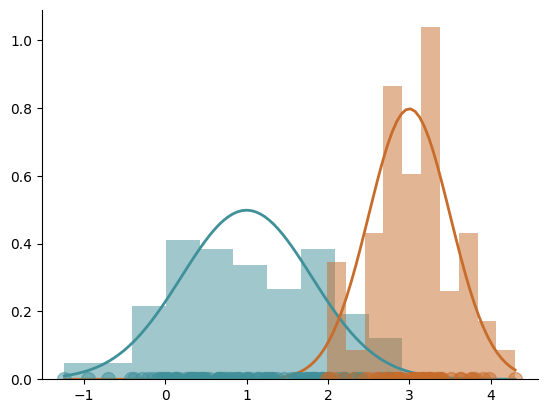

In [ ]:
# Visualize the data generated by the two normal distributions
viz([list(data1)]+[list(data2)],mu,sd)

In [ ]:
# Given the generated data, infer the means and the variances
import numpy as np
data = np.expand_dims(list(data1)+list(data2), axis=1)

## GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, init_params='random_from_data')
gmm.fit(data)

GaussianMixture(init_params='random_from_data', n_components=2)

GMM >>>
p(x) = 0.38Normal(0.41,0.82)+0.62Normal(2.48,0.58)


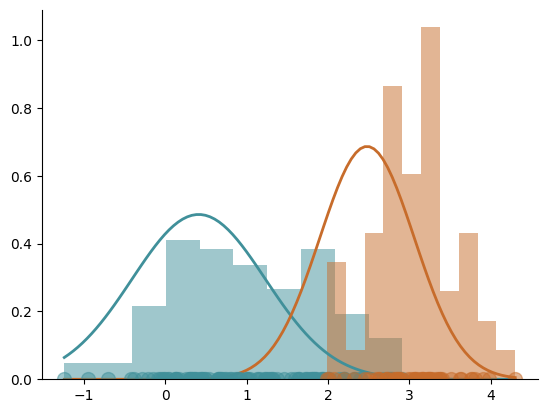

In [ ]:
print('GMM >>>')
### HW: Complete the code below ###
w1,w2 = gmm.weights_ # Q1 อันนี้ดึงค่า weight ของ gaussian ตัวที่ 1 และ 2 ที่โมเดลเรียนรู้มาค่ะ
mu1,mu2 = gmm.means_.flatten() # Q2 ค่าเฉลี่ยของ gaussian ทั้งสองตัว แล้วเอาไป flatten to 1D ค่า
sd2,sd1 = np.sqrt(gmm.covariances_.flatten()) # Q3 ดึงค่า covariance ออกมาแล้วเอาไปหาค่าส่วนเบี่ยงเบนมาตรฐานค่ะ

print('p(x) = %.2fNormal(%.2f,%.2f)+%.2fNormal(%.2f,%.2f)' %(w1,mu1,sd1,w2,mu2,sd2))

# Visualize the data and the inferred norms.
viz([list(data1), list(data2)], (mu1, mu2), (sd1, sd2)) # Q4 อันนี้ก็ตาม format ของฟังก์ชันที่อาจารย์สร้างไว้ค่ะ
### End of HW ###